In [ ]:
import os
os.environ["OPENBLAS_NUM_THREADS"] = "1"

import pandas as pd

#Bước 1: Đọc file dữ liệu gốc từ Excel
file_path = "Dataset/DL_ma_hoa_goc.xlsx"
df = pd.read_excel(file_path)

# Bước 2: Loại bỏ các hàng chứa giá trị thiếu (NaN) và các hàng trùng lặp hoàn toàn
df_cleaned = df.dropna().drop_duplicates()

# Bước 3: Ép kiểu cột GPA và NumberTL về kiểu số; nếu lỗi chuyển thành NaN
df_cleaned['GPA'] = pd.to_numeric(df_cleaned['GPA'], errors='coerce')
df_cleaned['NumberTL'] = pd.to_numeric(df_cleaned['NumberTL'], errors='coerce')


# Bước 4: Giữ lại các dòng có GPA hợp lệ trong khoảng [0, 4]
df_cleaned = df_cleaned[(df_cleaned['GPA'] >= 0) & (df_cleaned['GPA'] <= 4)]

# Bước 5: Giữ lại các sinh viên có NumberTL tăng dần theo học kỳ
def is_tl_monotonic(group):
    return group.sort_values('Học kì')['NumberTL'].is_monotonic_increasing
df_cleaned = df_cleaned.groupby('MSSV').filter(is_tl_monotonic)

# Bước 6: Giữ lại các sinh viên có học kỳ liên tiếp từ 1 đến N (không bị thiếu kỳ)
def is_sequential(group):
    return (group['Học kì'].sort_values().values == list(range(1, len(group) + 1))).all()
df_cleaned = df_cleaned.groupby('MSSV').filter(is_sequential)

# Bước 7: Tạo bảng tín chỉ qua 
df_cleaned['TC qua'] = df_cleaned.groupby('MSSV')['NumberTL'].diff().fillna(df_cleaned['NumberTL'])


def is_monotonic(group):
    return group['NumberTL'].is_monotonic_increasing

df_cleaned = df_cleaned.groupby('MSSV').filter(is_monotonic)

# Bước 8: Giữ lại cột cần thiết và đưa EncryptedID lên đầu
final_df =df_cleaned[['MSSV', 'Học kì', 'GPA','TC qua', 'NumberTL']].copy()


# Bước 8: Lưu dữ liệu đã làm sạch ra file Excel
output_path = "Data_clean/Data_GPA_CPA_1.xlsx"
final_df.to_excel(output_path, index=False)

print("✅ Đã lưu file dữ liệu sạch tại:", output_path)


✅ Đã lưu file dữ liệu sạch tại: Data_clean/Data_GPA_CPA_1.xlsx


In [5]:
import os
os.environ["OPENBLAS_NUM_THREADS"] = "1"

import pandas as pd

# Bước 1: Đọc dữ liệu
file_path = "Dataset/ET1_K62_K63_K64_performance.csv"
df = pd.read_csv(file_path)

# Bước 2: Giữ lại các cột cần thiết
df = df[['Semester', 'GPA', 'Acc', 'EncryptedID', 'TC qua']].copy()

# Bước 3: Loại bỏ dòng thiếu và trùng
df_cleaned = df.dropna().drop_duplicates()

# Bước 4: Ép kiểu GPA và Acc
df_cleaned['GPA'] = pd.to_numeric(df_cleaned['GPA'], errors='coerce')
df_cleaned['Acc'] = pd.to_numeric(df_cleaned['Acc'], errors='coerce')

# Bước 5: Loại GPA không hợp lệ
df_cleaned = df_cleaned[(df_cleaned['GPA'] >= 0) & (df_cleaned['GPA'] <= 4)]

# Bước 6: Chuẩn hóa học kỳ: đổi 'Semester' về 1, 2, 3,... theo từng sinh viên
df_cleaned = df_cleaned.sort_values(['EncryptedID', 'Semester']).copy()
df_cleaned['Semester'] = df_cleaned.groupby('EncryptedID').cumcount() + 1

# Bước 7: Loại sinh viên có Acc không tăng dần theo học kỳ
def is_monotonic(group):
    return group['Acc'].is_monotonic_increasing

df_cleaned = df_cleaned.groupby('EncryptedID').filter(is_monotonic)

# Bước 8: Giữ lại cột cần thiết và đưa EncryptedID lên đầu
final_df = df_cleaned[['EncryptedID', 'Semester', 'GPA', 'TC qua', 'Acc']].copy()

# Bước 9: Lưu ra Excel
output_path = "Data_clean/Data_CPA_CPA_ET2.csv"
final_df.to_csv(output_path, index=False)

print("✅ Đã lưu file dữ liệu sạch tại:", output_path)

✅ Đã lưu file dữ liệu sạch tại: Data_clean/Data_CPA_CPA_ET2.csv


In [ ]:
import os
os.environ["OPENBLAS_NUM_THREADS"] = "1"

import pandas as pd

# Bước 1: Đọc dữ liệu
file_path_1 = "Data_clean\Data_GPA_CPA_1.xlsx"
file_path_2 = "Data_clean\Data_CPA_CPA_ET2.csv"
df1 = pd.read_excel(file_path_1)
df2 = pd.read_csv(file_path_2)

# Bước 2: Đổi tên cột MSSV thành EncryptedID, NumberTL thành Acc, Học kỳ thành Semester trong df1
df1.rename(columns={
    'MSSV': 'EncryptedID', 
    'NumberTL': 'Acc', 
    'Học kì': 'Semester'
    }, inplace=True)

# Bước 3: Giữ lại các cột cần thiết
df1 = df1[['EncryptedID', 'Semester', 'GPA', 'TC qua', 'Acc']].copy()
df2 = df2[['EncryptedID', 'Semester', 'GPA', 'TC qua', 'Acc']].copy()

# Bước 4: Gộp hai DataFrame
final_df = pd.concat([df1, df2], ignore_index=True)

# Bước 5: Loại bỏ các dòng trùng lặp
final_df = final_df.drop_duplicates()
# Bước 6: Lưu ra file Excel
output_path = "Data_clean/Data_GPA_CPA_final.xlsx"
final_df.to_excel(output_path, index=False)
print("✅ Đã lưu file dữ liệu cuối cùng tại:", output_path)



✅ Đã lưu file dữ liệu cuối cùng tại: Data_clean/Data_GPA_CPA_final.xlsx


In [7]:
import os
os.environ["OPENBLAS_NUM_THREADS"] = "1"

import pandas as pd

# Bước 1: Đọc dữ liệu
file_path = "Data_clean/Data_GPA_CPA_final.xlsx"
file_path_EE = "Data_clean\EE2_K62_K63_K64_10_ky_clean.csv" 

df = pd.read_excel(file_path)
df_ee = pd.read_csv(file_path_EE)

df_ee.rename(columns={
    'TC_1': 'TC_qua_1', 
    'TC_2': 'TC_qua_2',
    'TC_3': 'TC_qua_3',
    'TC_4': 'TC_qua_4',
    'TC_5': 'TC_qua_5',
    'TC_6': 'TC_qua_6',
    'TC_7': 'TC_qua_7',
    'TC_8': 'TC_qua_8',
    'TC_9': 'TC_qua_9',
    'TC_10': 'TC_qua_10'
    }, inplace=True)

# Bước 2: Tách sinh viên học đúng 10 kỳ và 8 kỳ
sv_10_ky = df.groupby("EncryptedID").filter(lambda x: len(x) == 10)
sv_8_ky = df.groupby("EncryptedID").filter(lambda x: len(x) == 8)


# Bước 3: Loại sinh viên có GPA kỳ cuối bằng 0 
def remove_students_with_zero_final_gpa(data, so_ky):
    return data.groupby("EncryptedID").filter(
        lambda x: not x[x["Semester"] == so_ky]["GPA"].eq(0).any()
    )

# Bước 4: Loại sinh viên có tổng tín chỉ tích lũy cuối kỳ < ngưỡng ---
def remove_students_with_insufficient_credits(data, so_ky, tc_threshold):
    return data.groupby("EncryptedID").filter(
        lambda x: x[x["Semester"] == so_ky]["Acc"].values[0] >= tc_threshold
    )

sv_10_ky = remove_students_with_zero_final_gpa(sv_10_ky, 10)
sv_10_ky = remove_students_with_insufficient_credits(sv_10_ky, 10, 150)
sv_8_ky = remove_students_with_zero_final_gpa(sv_8_ky, 8)
sv_8_ky = remove_students_with_insufficient_credits(sv_8_ky, 8, 120)

# Bước 5: Tính Final CPA
def calculate_final_cpa(data, so_ky):
    gpa_pivot = data.pivot(index="EncryptedID", columns="Semester", values="GPA")
    gpa_pivot.columns = [f"GPA_{i}" for i in gpa_pivot.columns]

    Acc_pivot = data.pivot(index="EncryptedID", columns="Semester", values="Acc")
    Acc_pivot.columns = [f"TC_LK_{i}" for i in Acc_pivot.columns]

    tc_qua_pivot = data.pivot(index="EncryptedID", columns="Semester", values="TC qua")
    tc_qua_pivot.columns = [f"TC_qua_{i}" for i in tc_qua_pivot.columns]

    
    numerator = sum(gpa_pivot[f"GPA_{i}"] * tc_qua_pivot[f"TC_qua_{i}"] for i in range(1, so_ky + 1))
    denominator = sum(tc_qua_pivot[f"TC_qua_{i}"] for i in range(1, so_ky + 1))
    final_cpa = (numerator / denominator).round(2)

    # result = gpa_pivot.copy()
    result = pd.concat([gpa_pivot, tc_qua_pivot, Acc_pivot], axis=1)
    result["Final_CPA"] = final_cpa
    result =  result.reset_index()
    return result

# Bước 6: Tính Final CPA cho sinh viên
sv_10_ky_final = calculate_final_cpa(sv_10_ky, 10)
# sv_10_ky_final = pd.concat([sv_10_ky_final, df_ee], ignore_index=True)
# sv_10_ky_final = sv_10_ky_final.dropna().drop_duplicates()
sv_8_ky_final = calculate_final_cpa(sv_8_ky, 8) 

# Bước 7: Lưu kết quả ra file Excel
output_path_10_ky = "Data_clean/Data_GPA_CPA_final_10_ky.xlsx"
output_path_8_ky = "Data_clean/Data_GPA_CPA_final_8_ky.xlsx"
sv_10_ky_final.to_excel(output_path_10_ky, index=False)    
sv_8_ky_final.to_excel(output_path_8_ky, index=False)   


print("✅ Đã lưu file dữ liệu cuối cùng cho sinh viên 10 kỳ tại:", output_path_10_ky)
print("✅ Đã lưu file dữ liệu cuối cùng cho sinh viên 8 kỳ tại:", output_path_8_ky)


✅ Đã lưu file dữ liệu cuối cùng cho sinh viên 10 kỳ tại: Data_clean/Data_GPA_CPA_final_10_ky.xlsx
✅ Đã lưu file dữ liệu cuối cùng cho sinh viên 8 kỳ tại: Data_clean/Data_GPA_CPA_final_8_ky.xlsx


In [ ]:
import os
from pathlib import Path
import pandas as pd

os.environ["OPENBLAS_NUM_THREADS"] = "1"

# --- CẤU HÌNH ---
INPUT_CSV = Path("Dataset/ET1_K62_K63_K64.csv")
OUTPUT_XLSX = Path("Data_clean/Data_subject_pivot.xlsx")
REQUIRED_COURSES = [
    "Giải tích II", "Giải tích I", "Phương pháp tính", "Đại số", "Giải tích III",
    "Xác suất thống kê", "Vật lý đại cương II", "Vật lý đại cương I", "Tin học đại cương", "Vật lý điện tử",
    "Nhập môn kỹ thuật điện tử-viễn thông",
    "Thực tập cơ bản",
    "Technical Writing and Presentation",
    "Kỹ thuật lập trình C/C++",
    "Cấu kiện điện tử",
    "Lý thuyết mạch",
    "Tín hiệu và hệ thống",
    "Lý thuyết thông tin",
    "Cơ sở kỹ thuật đo lường",
    "Cấu trúc dữ liệu và giải thuật",
    "Trường điện từ",
    "Điện tử số",
    "Điện tử tương tự I",
    "Điện tử tương tự II",
    "Thông tin số",
    "Kỹ thuật phần mềm ứng dụng",
    "Anten và truyền sóng",
    "Đồ án thiết kế I",
    "Kỹ thuật vi xử lý",
    "Đồ án thiết kế II",
    "Xử lý tín hiệu số",
    "Lý thuyết mật mã",
    "Cơ sở truyền số liệu",
    "Mạng máy tính",
    "Hệ thống viễn thông",
    "Hệ điều hành",
    "Thông tin vô tuyến",
    "Cơ sở điện sinh học",
    "Cảm biến và KT đo lường y sinh",
    "Thiết bị điện tử y sinh I",
    "Giải phẫu và sinh lý học",
    "Mạch xử lý tín hiệu y sinh",
    "Công nghệ chẩn đoán hình ảnh I",
    "Đa phương tiện",
    "Kỹ thuật truyền hình",
    "Thiết kế IC tương tự",
    "Thiết kế VLSI",
    "Kiểm chứng và kiểm tra vi mạch",
    "Hệ thống nhúng và thiết kế giao tiếp nhúng"
]
GRADE_MAPPING = {
    'A+': 4.0, 'A': 4.0, 'B+': 3.5, 'B': 3.0,
    'C+': 2.5, 'C': 2.0, 'D+': 1.5, 'D': 1.0
}

# --- HÀM CHÍNH ---
def process_grades(input_csv: Path, output_xlsx: Path):
    print(f"🔍 Đang đọc dữ liệu từ: {input_csv}")
    df = pd.read_csv(input_csv)

    # Chọn cột cần thiết
    needed_columns = ["EncryptedID", "Course ID", "Course Name", "Final Grade"]
    missing_cols = [c for c in needed_columns if c not in df.columns]
    if missing_cols:
        raise ValueError(f"Các cột sau thiếu trong file nguồn: {missing_cols}")
    df_cleaned = df[needed_columns].copy()
    

    # Map điểm chữ sang số
    df_cleaned["Final Grade Numeric"] = df_cleaned["Final Grade"].map(GRADE_MAPPING)

    # Báo nếu có grade không hợp lệ
    invalid_grades = df_cleaned["Final Grade"].isna() & df_cleaned["Final Grade Numeric"].isna()
    if invalid_grades.any():
        count_invalid = invalid_grades.sum()
        print(f"⚠️ Có {count_invalid} dòng có 'Final Grade' không nằm trong mapping và sẽ bị loại (ví dụ: {df_cleaned.loc[invalid_grades, 'Final Grade'].unique()[:5]})")

    # Loại bỏ NaN sau khi map (chỉ giữ những grade hợp lệ)
    df_cleaned = df_cleaned.dropna(subset=["Final Grade Numeric"])

    # Lọc các môn cần thiết (nếu Course Name trùng)
    df_filtered = df_cleaned[df_cleaned["Course Name"].isin(REQUIRED_COURSES)].copy()
    print(f"✅ Sau khi lọc theo danh sách môn: còn {len(df_filtered)} dòng.")

    # Lấy điểm tốt nhất của mỗi sinh viên cho mỗi môn
    df_best = (
        df_filtered
        .groupby(["EncryptedID", "Course ID", "Course Name"], dropna=False)["Final Grade Numeric"]
        .max()
        .reset_index()
    )
    
    # Pivot dùng best scores
    pivot_df = df_best.pivot_table(
        index="EncryptedID",
        columns="Course Name",
        values="Final Grade Numeric",
        aggfunc="first"  # đã là max rồi
    )

    # Đảm bảo thứ tự cột theo REQUIRED_COURSES, nhưng chỉ lấy những course thực sự có trong dữ liệu
    existing_cols = [c for c in REQUIRED_COURSES if c in pivot_df.columns]
    pivot_df = pivot_df.reindex(columns=existing_cols)
    pivot_df = pivot_df.reset_index()

    # Tạo thư mục đầu ra nếu chưa có
    output_xlsx.parent.mkdir(parents=True, exist_ok=True)
    pivot_df.to_excel(output_xlsx, index=False)
    print(f"✅ Đã lưu bảng xoay (pivot) vào: {output_xlsx}")

if __name__ == "__main__":
    process_grades(INPUT_CSV, OUTPUT_XLSX)


🔍 Đang đọc dữ liệu từ: Dataset\ET1_K62_K63_K64.csv
✅ Sau khi lọc theo danh sách môn: còn 52812 dòng.
✅ Đã lưu bảng xoay (pivot) vào: Data_clean\Data_subject_pivot.xlsx


In [1]:
import os
from pathlib import Path
import pandas as pd

os.environ["OPENBLAS_NUM_THREADS"] = "1"

INPUT = Path("Data_clean/Data_subject_pivot.xlsx")
OUTPUT = Path("Data_clean/Data_subject_complete.xlsx")

REQUIRED_COURSES = [
    "Giải tích II", "Giải tích I", "Phương pháp tính", "Đại số", "Giải tích III",
    "Xác suất thống kê", "Vật lý đại cương II", "Vật lý đại cương I", "Tin học đại cương", "Vật lý điện tử",
    "Nhập môn kỹ thuật điện tử-viễn thông",
    "Thực tập cơ bản",
    "Technical Writing and Presentation",
    "Kỹ thuật lập trình C/C++",
    "Cấu kiện điện tử",
    "Lý thuyết mạch",
    "Tín hiệu và hệ thống",
    "Lý thuyết thông tin",
    "Cơ sở kỹ thuật đo lường",
    "Cấu trúc dữ liệu và giải thuật",
    "Trường điện từ",
    "Điện tử số",
    "Điện tử tương tự I",
    "Điện tử tương tự II",
    "Thông tin số",
    "Kỹ thuật phần mềm ứng dụng",
    "Anten và truyền sóng",
    "Đồ án thiết kế I",
    "Kỹ thuật vi xử lý",
    "Đồ án thiết kế II",
    "Xử lý tín hiệu số",
]

# Đọc dữ liệu
df = pd.read_excel(INPUT)

# Giữ chỉ EncryptedID và những môn thực sự có trong file
available_courses = [c for c in REQUIRED_COURSES if c in df.columns]
keep_cols = ["EncryptedID"] + available_courses
df = df[keep_cols].copy()

# Lọc chỉ sinh viên có đầy đủ điểm (không có NaN ở tất cả các môn)
df_complete = df.dropna(subset=available_courses, how="any")  # tương đương với: ~df[available_courses].isna().any(axis=1)

# df_complete = df_complete.sample(frac=1, random_state=42).reset_index(drop=True)
# n = len(df_complete)
# n_train = int(n * 0.6)
# n_val = int(n * 0.2)
# n_test = n - n_train - n_val

# split_col = (
#     ["train"] * n_train + 
#     ["val"] * n_val + 
#     ["test"] * n_test
# )

# df_complete["split"] = split_col



# Ghi ra file
OUTPUT.parent.mkdir(parents=True, exist_ok=True)
df_complete.to_excel(OUTPUT, index=False)
print(f"✅ Đã xuất sinh viên đủ tất cả môn (chỉ ID + môn) vào: {OUTPUT}")


✅ Đã xuất sinh viên đủ tất cả môn (chỉ ID + môn) vào: Data_clean\Data_subject_complete.xlsx


In [1]:
import os
from pathlib import Path
import pandas as pd

os.environ["OPENBLAS_NUM_THREADS"] = "1"

INPUT = Path("Data_clean/Data_subject_pivot.xlsx")
OUTPUT = Path("Data_clean/Data_subject_module_1.xlsx")

REQUIRED_COURSES = [
    "Giải tích II", "Giải tích I", "Phương pháp tính", "Đại số", "Giải tích III",
    "Xác suất thống kê", "Vật lý đại cương II", "Vật lý đại cương I", "Tin học đại cương", "Vật lý điện tử",
    "Nhập môn kỹ thuật điện tử-viễn thông",
    "Thực tập cơ bản",
    "Technical Writing and Presentation",
    "Kỹ thuật lập trình C/C++",
    "Cấu kiện điện tử",
    "Lý thuyết mạch",
    "Tín hiệu và hệ thống",
    "Lý thuyết thông tin",
    "Cơ sở kỹ thuật đo lường",
    "Cấu trúc dữ liệu và giải thuật",
    "Trường điện từ",
    "Điện tử số",
    "Điện tử tương tự I",
    "Điện tử tương tự II",
    "Thông tin số",
    "Kỹ thuật phần mềm ứng dụng",
    "Anten và truyền sóng",
    "Đồ án thiết kế I",
    "Kỹ thuật vi xử lý",
    "Đồ án thiết kế II",
    "Xử lý tín hiệu số",
    "Lý thuyết mật mã",
    "Cơ sở truyền số liệu",
    "Mạng máy tính",
    "Hệ thống viễn thông",
    "Hệ điều hành",
]

# Đọc dữ liệu
df = pd.read_excel(INPUT)

# Giữ chỉ EncryptedID và những môn thực sự có trong file
available_courses = [c for c in REQUIRED_COURSES if c in df.columns]
keep_cols = ["EncryptedID"] + available_courses
df = df[keep_cols].copy()

# Lọc chỉ sinh viên có đầy đủ điểm (không có NaN ở tất cả các môn)
df_complete = df.dropna(subset=available_courses, how="any")  # tương đương với: ~df[available_courses].isna().any(axis=1)

df_complete = df_complete.sample(frac=1, random_state=42).reset_index(drop=True)
n = len(df_complete)
n_train = int(n * 0.6)
n_val = int(n * 0.2)
n_test = n - n_train - n_val

split_col = (
    ["train"] * n_train + 
    ["val"] * n_val + 
    ["test"] * n_test
)

df_complete["split"] = split_col



# Ghi ra file
OUTPUT.parent.mkdir(parents=True, exist_ok=True)
df_complete.to_excel(OUTPUT, index=False)
print(f"✅ Đã xuất sinh viên đủ tất cả môn (chỉ ID + môn) vào: {OUTPUT}")


✅ Đã xuất sinh viên đủ tất cả môn (chỉ ID + môn) vào: Data_clean\Data_subject_module_1.xlsx


In [2]:
import os
from pathlib import Path
import pandas as pd

os.environ["OPENBLAS_NUM_THREADS"] = "1"

INPUT = Path("Data_clean/Data_subject_pivot.xlsx")
OUTPUT = Path("Data_clean/Data_subject_module_2.xlsx")

REQUIRED_COURSES = [
    "Giải tích II", "Giải tích I", "Phương pháp tính", "Đại số", "Giải tích III",
    "Xác suất thống kê", "Vật lý đại cương II", "Vật lý đại cương I", "Tin học đại cương", "Vật lý điện tử",
    "Nhập môn kỹ thuật điện tử-viễn thông",
    "Thực tập cơ bản",
    "Technical Writing and Presentation",
    "Kỹ thuật lập trình C/C++",
    "Cấu kiện điện tử",
    "Lý thuyết mạch",
    "Tín hiệu và hệ thống",
    "Lý thuyết thông tin",
    "Cơ sở kỹ thuật đo lường",
    "Cấu trúc dữ liệu và giải thuật",
    "Trường điện từ",
    "Điện tử số",
    "Điện tử tương tự I",
    "Điện tử tương tự II",
    "Thông tin số",
    "Kỹ thuật phần mềm ứng dụng",
    "Anten và truyền sóng",
    "Đồ án thiết kế I",
    "Kỹ thuật vi xử lý",
    "Đồ án thiết kế II",
    "Xử lý tín hiệu số",
    "Lý thuyết mật mã",
    "Cơ sở truyền số liệu",
    "Mạng máy tính",
    "Hệ thống viễn thông",
    "Thông tin vô tuyến",
]

# Đọc dữ liệu
df = pd.read_excel(INPUT)

# Giữ chỉ EncryptedID và những môn thực sự có trong file
available_courses = [c for c in REQUIRED_COURSES if c in df.columns]
keep_cols = ["EncryptedID"] + available_courses
df = df[keep_cols].copy()

# Lọc chỉ sinh viên có đầy đủ điểm (không có NaN ở tất cả các môn)
df_complete = df.dropna(subset=available_courses, how="any")  # tương đương với: ~df[available_courses].isna().any(axis=1)

df_complete = df_complete.sample(frac=1, random_state=42).reset_index(drop=True)
n = len(df_complete)
n_train = int(n * 0.6)
n_val = int(n * 0.2)
n_test = n - n_train - n_val

split_col = (
    ["train"] * n_train + 
    ["val"] * n_val + 
    ["test"] * n_test
)

df_complete["split"] = split_col



# Ghi ra file
OUTPUT.parent.mkdir(parents=True, exist_ok=True)
df_complete.to_excel(OUTPUT, index=False)
print(f"✅ Đã xuất sinh viên đủ tất cả môn (chỉ ID + môn) vào: {OUTPUT}")


✅ Đã xuất sinh viên đủ tất cả môn (chỉ ID + môn) vào: Data_clean\Data_subject_module_2.xlsx


In [3]:
import os
from pathlib import Path
import pandas as pd

os.environ["OPENBLAS_NUM_THREADS"] = "1"

INPUT = Path("Data_clean/Data_subject_pivot.xlsx")
OUTPUT = Path("Data_clean/Data_subject_module_3.xlsx")

REQUIRED_COURSES = [
    "Giải tích II", "Giải tích I", "Phương pháp tính", "Đại số", "Giải tích III",
    "Xác suất thống kê", "Vật lý đại cương II", "Vật lý đại cương I", "Tin học đại cương", "Vật lý điện tử",
    "Nhập môn kỹ thuật điện tử-viễn thông",
    "Thực tập cơ bản",
    "Technical Writing and Presentation",
    "Kỹ thuật lập trình C/C++",
    "Cấu kiện điện tử",
    "Lý thuyết mạch",
    "Tín hiệu và hệ thống",
    "Lý thuyết thông tin",
    "Cơ sở kỹ thuật đo lường",
    "Cấu trúc dữ liệu và giải thuật",
    "Trường điện từ",
    "Điện tử số",
    "Điện tử tương tự I",
    "Điện tử tương tự II",
    "Thông tin số",
    "Kỹ thuật phần mềm ứng dụng",
    "Anten và truyền sóng",
    "Đồ án thiết kế I",
    "Kỹ thuật vi xử lý",
    "Đồ án thiết kế II",
    "Xử lý tín hiệu số",
    "Cơ sở điện sinh học",
    "Cảm biến và KT đo lường y sinh",
    "Thiết bị điện tử y sinh I",
    "Giải phẫu và sinh lý học",
    "Mạch xử lý tín hiệu y sinh",
    "Công nghệ chẩn đoán hình ảnh I",
]

# Đọc dữ liệu
df = pd.read_excel(INPUT)

# Giữ chỉ EncryptedID và những môn thực sự có trong file
available_courses = [c for c in REQUIRED_COURSES if c in df.columns]
keep_cols = ["EncryptedID"] + available_courses
df = df[keep_cols].copy()

# Lọc chỉ sinh viên có đầy đủ điểm (không có NaN ở tất cả các môn)
df_complete = df.dropna(subset=available_courses, how="any")  # tương đương với: ~df[available_courses].isna().any(axis=1)

df_complete = df_complete.sample(frac=1, random_state=42).reset_index(drop=True)
n = len(df_complete)
n_train = int(n * 0.6)
n_val = int(n * 0.2)
n_test = n - n_train - n_val

split_col = (
    ["train"] * n_train + 
    ["val"] * n_val + 
    ["test"] * n_test
)

df_complete["split"] = split_col



# Ghi ra file
OUTPUT.parent.mkdir(parents=True, exist_ok=True)
df_complete.to_excel(OUTPUT, index=False)
print(f"✅ Đã xuất sinh viên đủ tất cả môn (chỉ ID + môn) vào: {OUTPUT}")


✅ Đã xuất sinh viên đủ tất cả môn (chỉ ID + môn) vào: Data_clean\Data_subject_module_3.xlsx


In [4]:
import os
from pathlib import Path
import pandas as pd

os.environ["OPENBLAS_NUM_THREADS"] = "1"

INPUT = Path("Data_clean/Data_subject_pivot.xlsx")
OUTPUT = Path("Data_clean/Data_subject_module_4.xlsx")

REQUIRED_COURSES = [
    "Giải tích II", "Giải tích I", "Phương pháp tính", "Đại số", "Giải tích III",
    "Xác suất thống kê", "Vật lý đại cương II", "Vật lý đại cương I", "Tin học đại cương", "Vật lý điện tử",
    "Nhập môn kỹ thuật điện tử-viễn thông",
    "Thực tập cơ bản",
    "Technical Writing and Presentation",
    "Kỹ thuật lập trình C/C++",
    "Cấu kiện điện tử",
    "Lý thuyết mạch",
    "Tín hiệu và hệ thống",
    "Lý thuyết thông tin",
    "Cơ sở kỹ thuật đo lường",
    "Cấu trúc dữ liệu và giải thuật",
    "Trường điện từ",
    "Điện tử số",
    "Điện tử tương tự I",
    "Điện tử tương tự II",
    "Thông tin số",
    "Kỹ thuật phần mềm ứng dụng",
    "Anten và truyền sóng",
    "Đồ án thiết kế I",
    "Kỹ thuật vi xử lý",
    "Đồ án thiết kế II",
    "Xử lý tín hiệu số",
    "Thông tin vô tuyến","Lý thuyết mật mã","Truyền số liệu và chuyển tiếp điện văn","Định vị và dẫn đường điện tử","Hệ thống viễn thông",
]

# Đọc dữ liệu
df = pd.read_excel(INPUT)

# Giữ chỉ EncryptedID và những môn thực sự có trong file
available_courses = [c for c in REQUIRED_COURSES if c in df.columns]
keep_cols = ["EncryptedID"] + available_courses
df = df[keep_cols].copy()

# Lọc chỉ sinh viên có đầy đủ điểm (không có NaN ở tất cả các môn)
df_complete = df.dropna(subset=available_courses, how="any")  # tương đương với: ~df[available_courses].isna().any(axis=1)

df_complete = df_complete.sample(frac=1, random_state=42).reset_index(drop=True)
n = len(df_complete)
n_train = int(n * 0.6)
n_val = int(n * 0.2)
n_test = n - n_train - n_val

split_col = (
    ["train"] * n_train + 
    ["val"] * n_val + 
    ["test"] * n_test
)

df_complete["split"] = split_col



# Ghi ra file
OUTPUT.parent.mkdir(parents=True, exist_ok=True)
df_complete.to_excel(OUTPUT, index=False)
print(f"✅ Đã xuất sinh viên đủ tất cả môn (chỉ ID + môn) vào: {OUTPUT}")


✅ Đã xuất sinh viên đủ tất cả môn (chỉ ID + môn) vào: Data_clean\Data_subject_module_4.xlsx


In [5]:
import os
from pathlib import Path
import pandas as pd

os.environ["OPENBLAS_NUM_THREADS"] = "1"

INPUT = Path("Data_clean/Data_subject_pivot.xlsx")
OUTPUT = Path("Data_clean/Data_subject_module_5.xlsx")

REQUIRED_COURSES = [
    "Giải tích II", "Giải tích I", "Phương pháp tính", "Đại số", "Giải tích III",
    "Xác suất thống kê", "Vật lý đại cương II", "Vật lý đại cương I", "Tin học đại cương", "Vật lý điện tử",
    "Nhập môn kỹ thuật điện tử-viễn thông",
    "Thực tập cơ bản",
    "Technical Writing and Presentation",
    "Kỹ thuật lập trình C/C++",
    "Cấu kiện điện tử",
    "Lý thuyết mạch",
    "Tín hiệu và hệ thống",
    "Lý thuyết thông tin",
    "Cơ sở kỹ thuật đo lường",
    "Cấu trúc dữ liệu và giải thuật",
    "Trường điện từ",
    "Điện tử số",
    "Điện tử tương tự I",
    "Điện tử tương tự II",
    "Thông tin số",
    "Kỹ thuật phần mềm ứng dụng",
    "Anten và truyền sóng",
    "Đồ án thiết kế I",
    "Kỹ thuật vi xử lý",
    "Đồ án thiết kế II",
    "Xử lý tín hiệu số",
    "Lý thuyết mật mã",
    "Cơ sở truyền số liệu",
    "Mạng máy tính",
    "Hệ thống viễn thông",
    "Đa phương tiện",
    "Kỹ thuật truyền hình",
    
]

# Đọc dữ liệu
df = pd.read_excel(INPUT)

# Giữ chỉ EncryptedID và những môn thực sự có trong file
available_courses = [c for c in REQUIRED_COURSES if c in df.columns]
keep_cols = ["EncryptedID"] + available_courses
df = df[keep_cols].copy()

# Lọc chỉ sinh viên có đầy đủ điểm (không có NaN ở tất cả các môn)
df_complete = df.dropna(subset=available_courses, how="any")  # tương đương với: ~df[available_courses].isna().any(axis=1)

df_complete = df_complete.sample(frac=1, random_state=42).reset_index(drop=True)
n = len(df_complete)
n_train = int(n * 0.6)
n_val = int(n * 0.2)
n_test = n - n_train - n_val

split_col = (
    ["train"] * n_train + 
    ["val"] * n_val + 
    ["test"] * n_test
)

df_complete["split"] = split_col



# Ghi ra file
OUTPUT.parent.mkdir(parents=True, exist_ok=True)
df_complete.to_excel(OUTPUT, index=False)
print(f"✅ Đã xuất sinh viên đủ tất cả môn (chỉ ID + môn) vào: {OUTPUT}")


✅ Đã xuất sinh viên đủ tất cả môn (chỉ ID + môn) vào: Data_clean\Data_subject_module_5.xlsx


In [6]:
import os
from pathlib import Path
import pandas as pd

os.environ["OPENBLAS_NUM_THREADS"] = "1"

INPUT = Path("Data_clean/Data_subject_pivot.xlsx")
OUTPUT = Path("Data_clean/Data_subject_module_6.xlsx")

REQUIRED_COURSES = [
    "Giải tích II", "Giải tích I", "Phương pháp tính", "Đại số", "Giải tích III",
    "Xác suất thống kê", "Vật lý đại cương II", "Vật lý đại cương I", "Tin học đại cương", "Vật lý điện tử",
    "Nhập môn kỹ thuật điện tử-viễn thông",
    "Thực tập cơ bản",
    "Technical Writing and Presentation",
    "Kỹ thuật lập trình C/C++",
    "Cấu kiện điện tử",
    "Lý thuyết mạch",
    "Tín hiệu và hệ thống",
    "Lý thuyết thông tin",
    "Cơ sở kỹ thuật đo lường",
    "Cấu trúc dữ liệu và giải thuật",
    "Trường điện từ",
    "Điện tử số",
    "Điện tử tương tự I",
    "Điện tử tương tự II",
    "Thông tin số",
    "Kỹ thuật phần mềm ứng dụng",
    "Anten và truyền sóng",
    "Đồ án thiết kế I",
    "Kỹ thuật vi xử lý",
    "Đồ án thiết kế II",
    "Xử lý tín hiệu số",
    "Thiết kế IC tương tự",
    "Thiết kế VLSI",
    "Kiểm chứng và kiểm tra vi mạch",
    "Cơ sở công nghệ vi điện tử",
    "Hệ thống nhúng và thiết kế giao tiếp nhúng"
]

# Đọc dữ liệu
df = pd.read_excel(INPUT)

# Giữ chỉ EncryptedID và những môn thực sự có trong file
available_courses = [c for c in REQUIRED_COURSES if c in df.columns]
keep_cols = ["EncryptedID"] + available_courses
df = df[keep_cols].copy()

# Lọc chỉ sinh viên có đầy đủ điểm (không có NaN ở tất cả các môn)
df_complete = df.dropna(subset=available_courses, how="any")  # tương đương với: ~df[available_courses].isna().any(axis=1)

df_complete = df_complete.sample(frac=1, random_state=42).reset_index(drop=True)
n = len(df_complete)
n_train = int(n * 0.6)
n_val = int(n * 0.2)
n_test = n - n_train - n_val

split_col = (
    ["train"] * n_train + 
    ["val"] * n_val + 
    ["test"] * n_test
)

df_complete["split"] = split_col



# Ghi ra file
OUTPUT.parent.mkdir(parents=True, exist_ok=True)
df_complete.to_excel(OUTPUT, index=False)
print(f"✅ Đã xuất sinh viên đủ tất cả môn (chỉ ID + môn) vào: {OUTPUT}")


✅ Đã xuất sinh viên đủ tất cả môn (chỉ ID + môn) vào: Data_clean\Data_subject_module_6.xlsx


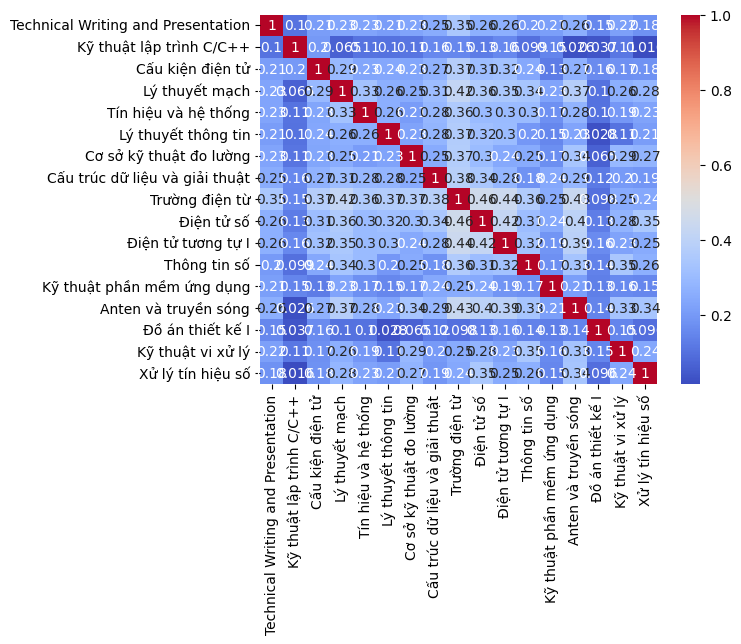

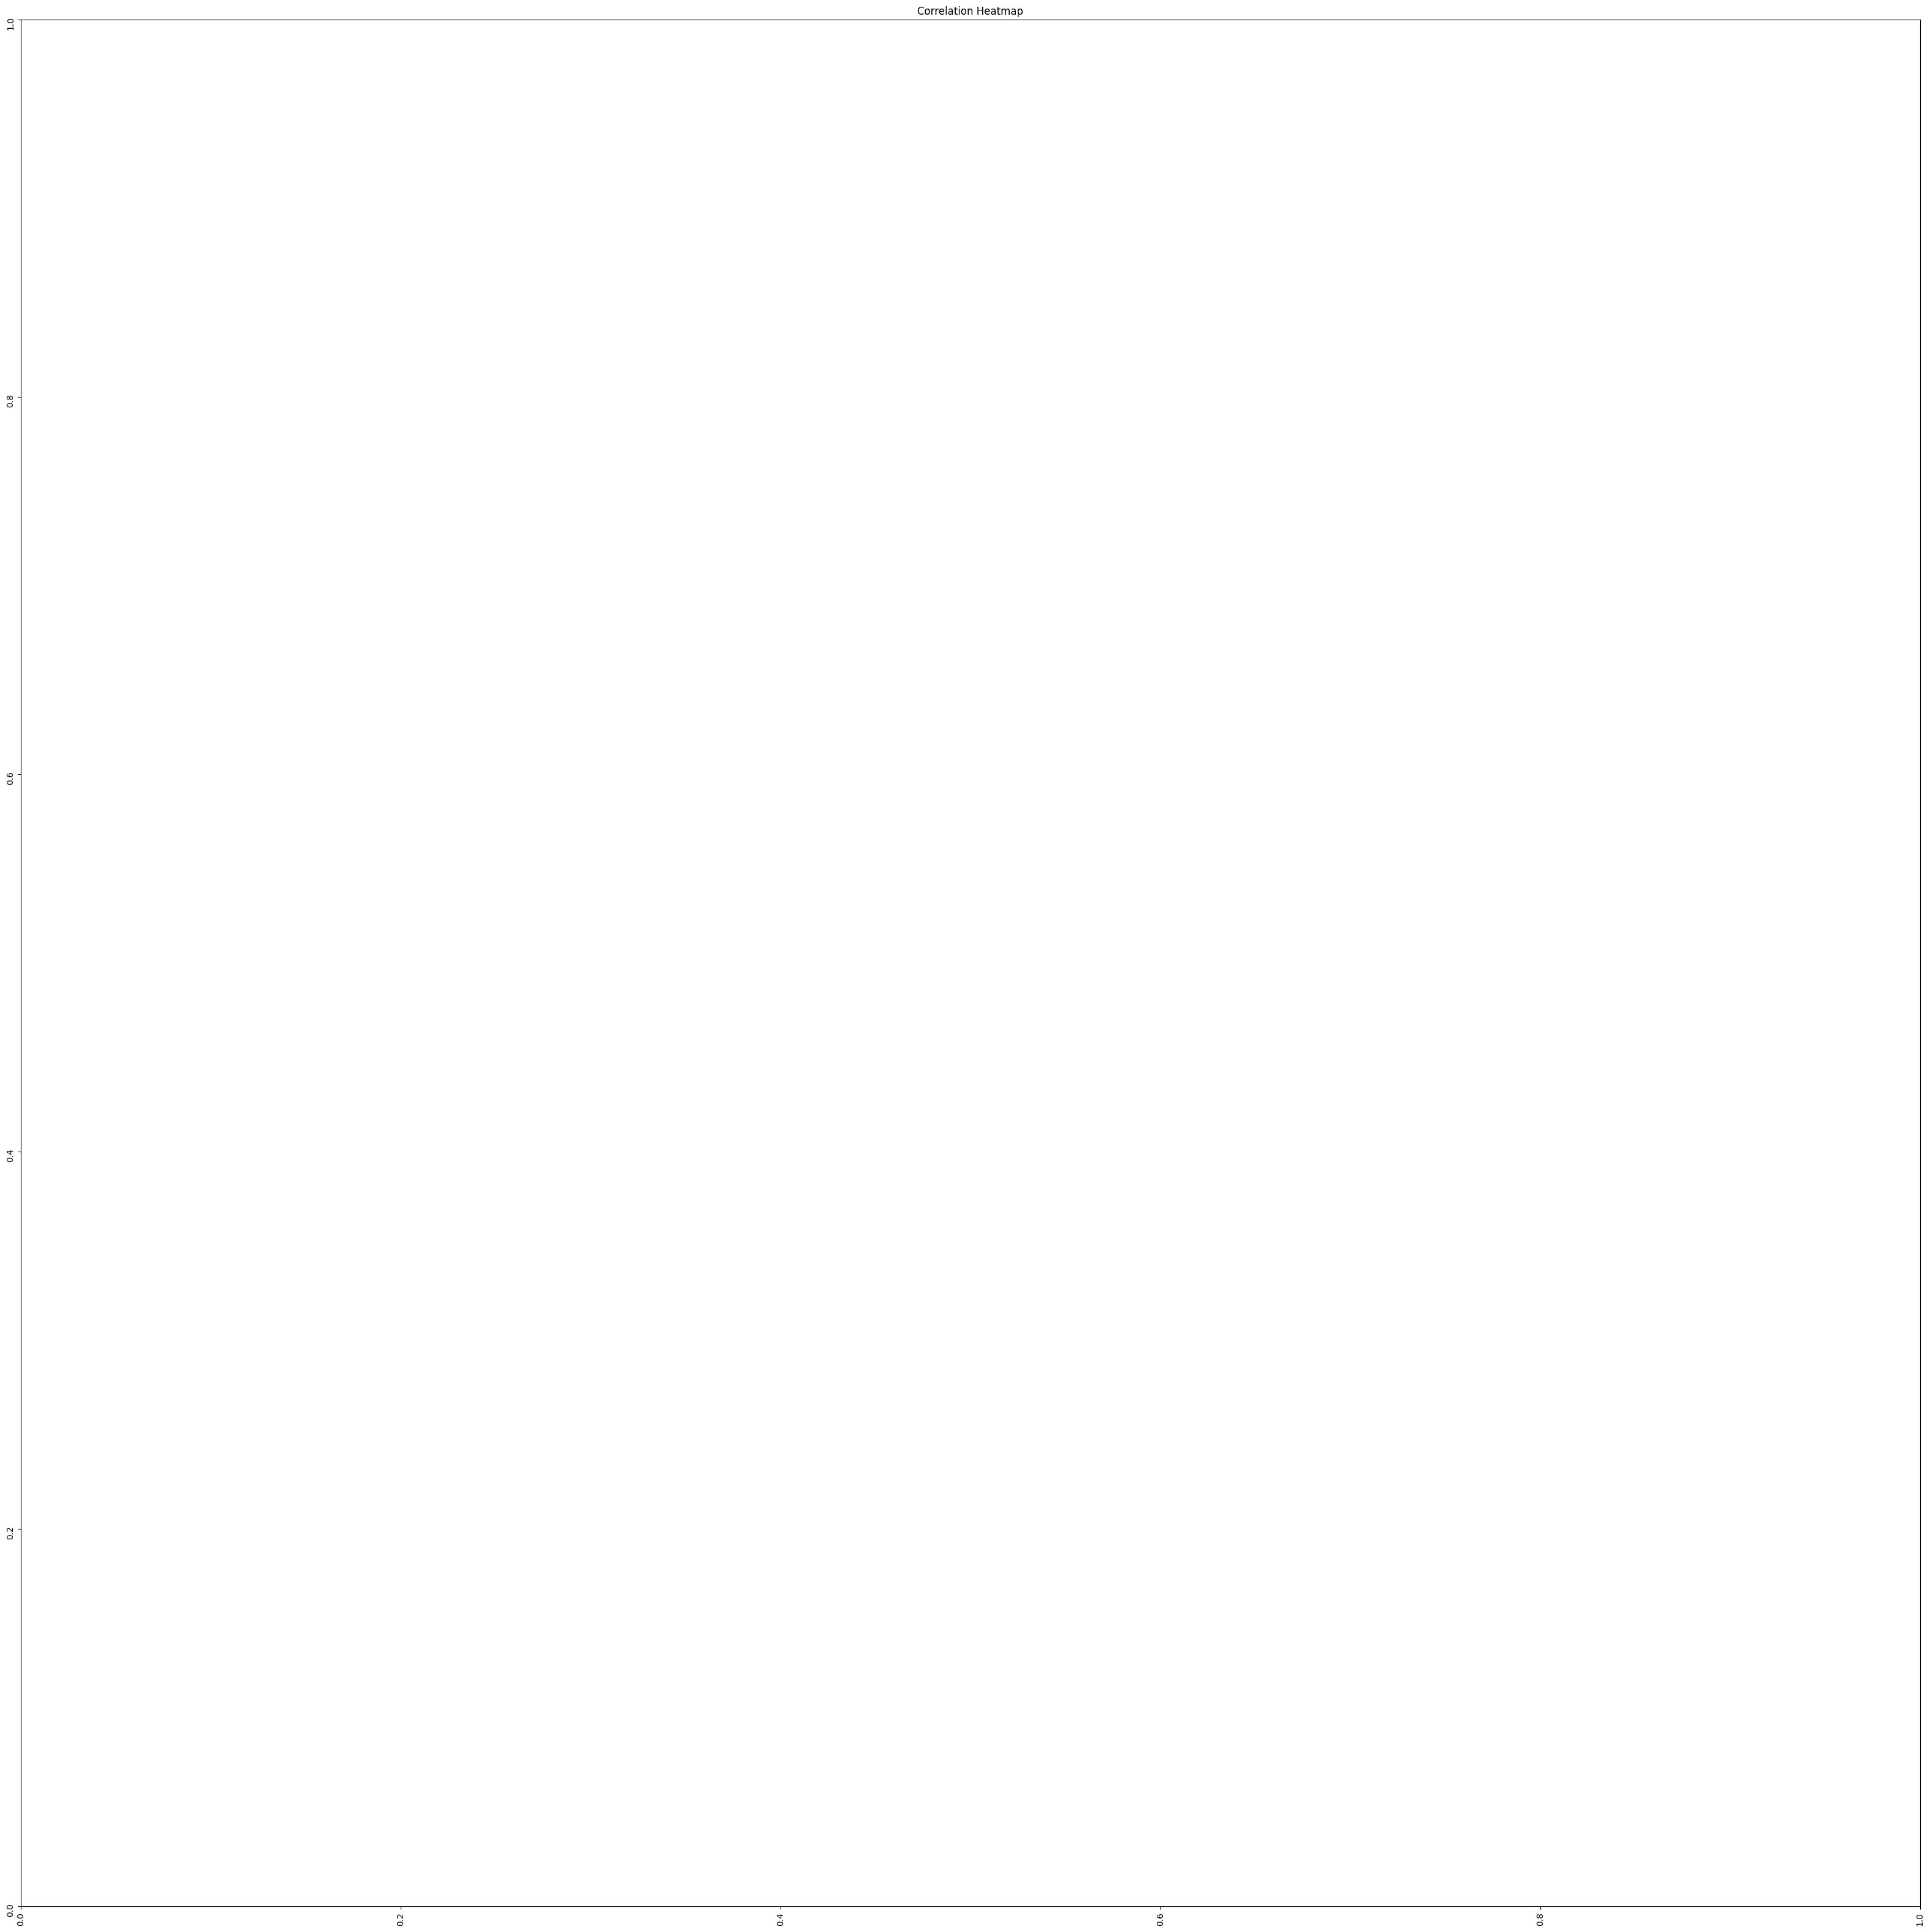

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel("Data_clean/Data_subject_complete.xlsx")
# 
sns.heatmap(df[[ 

 
    "Technical Writing and Presentation",
    "Kỹ thuật lập trình C/C++",
    "Cấu kiện điện tử",
    "Lý thuyết mạch",
    "Tín hiệu và hệ thống",
    "Lý thuyết thông tin",
    "Cơ sở kỹ thuật đo lường",
    "Cấu trúc dữ liệu và giải thuật",
    "Trường điện từ",
    "Điện tử số",
    "Điện tử tương tự I",
    "Thông tin số",
    "Kỹ thuật phần mềm ứng dụng",
    "Anten và truyền sóng",
    "Đồ án thiết kế I",
    "Kỹ thuật vi xử lý",
    "Xử lý tín hiệu số"
    
    ]].corr(), annot=True, cmap='coolwarm')
plt.figure(figsize=(40,40))  # tùy chỉnh chiều rộng và chiều cao
# sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')

plt.title('Correlation Heatmap')
plt.yticks(rotation=90)
plt.xticks(rotation=90)
plt.show()

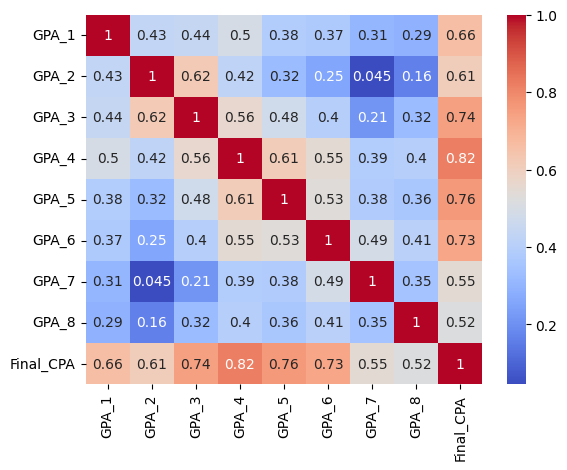

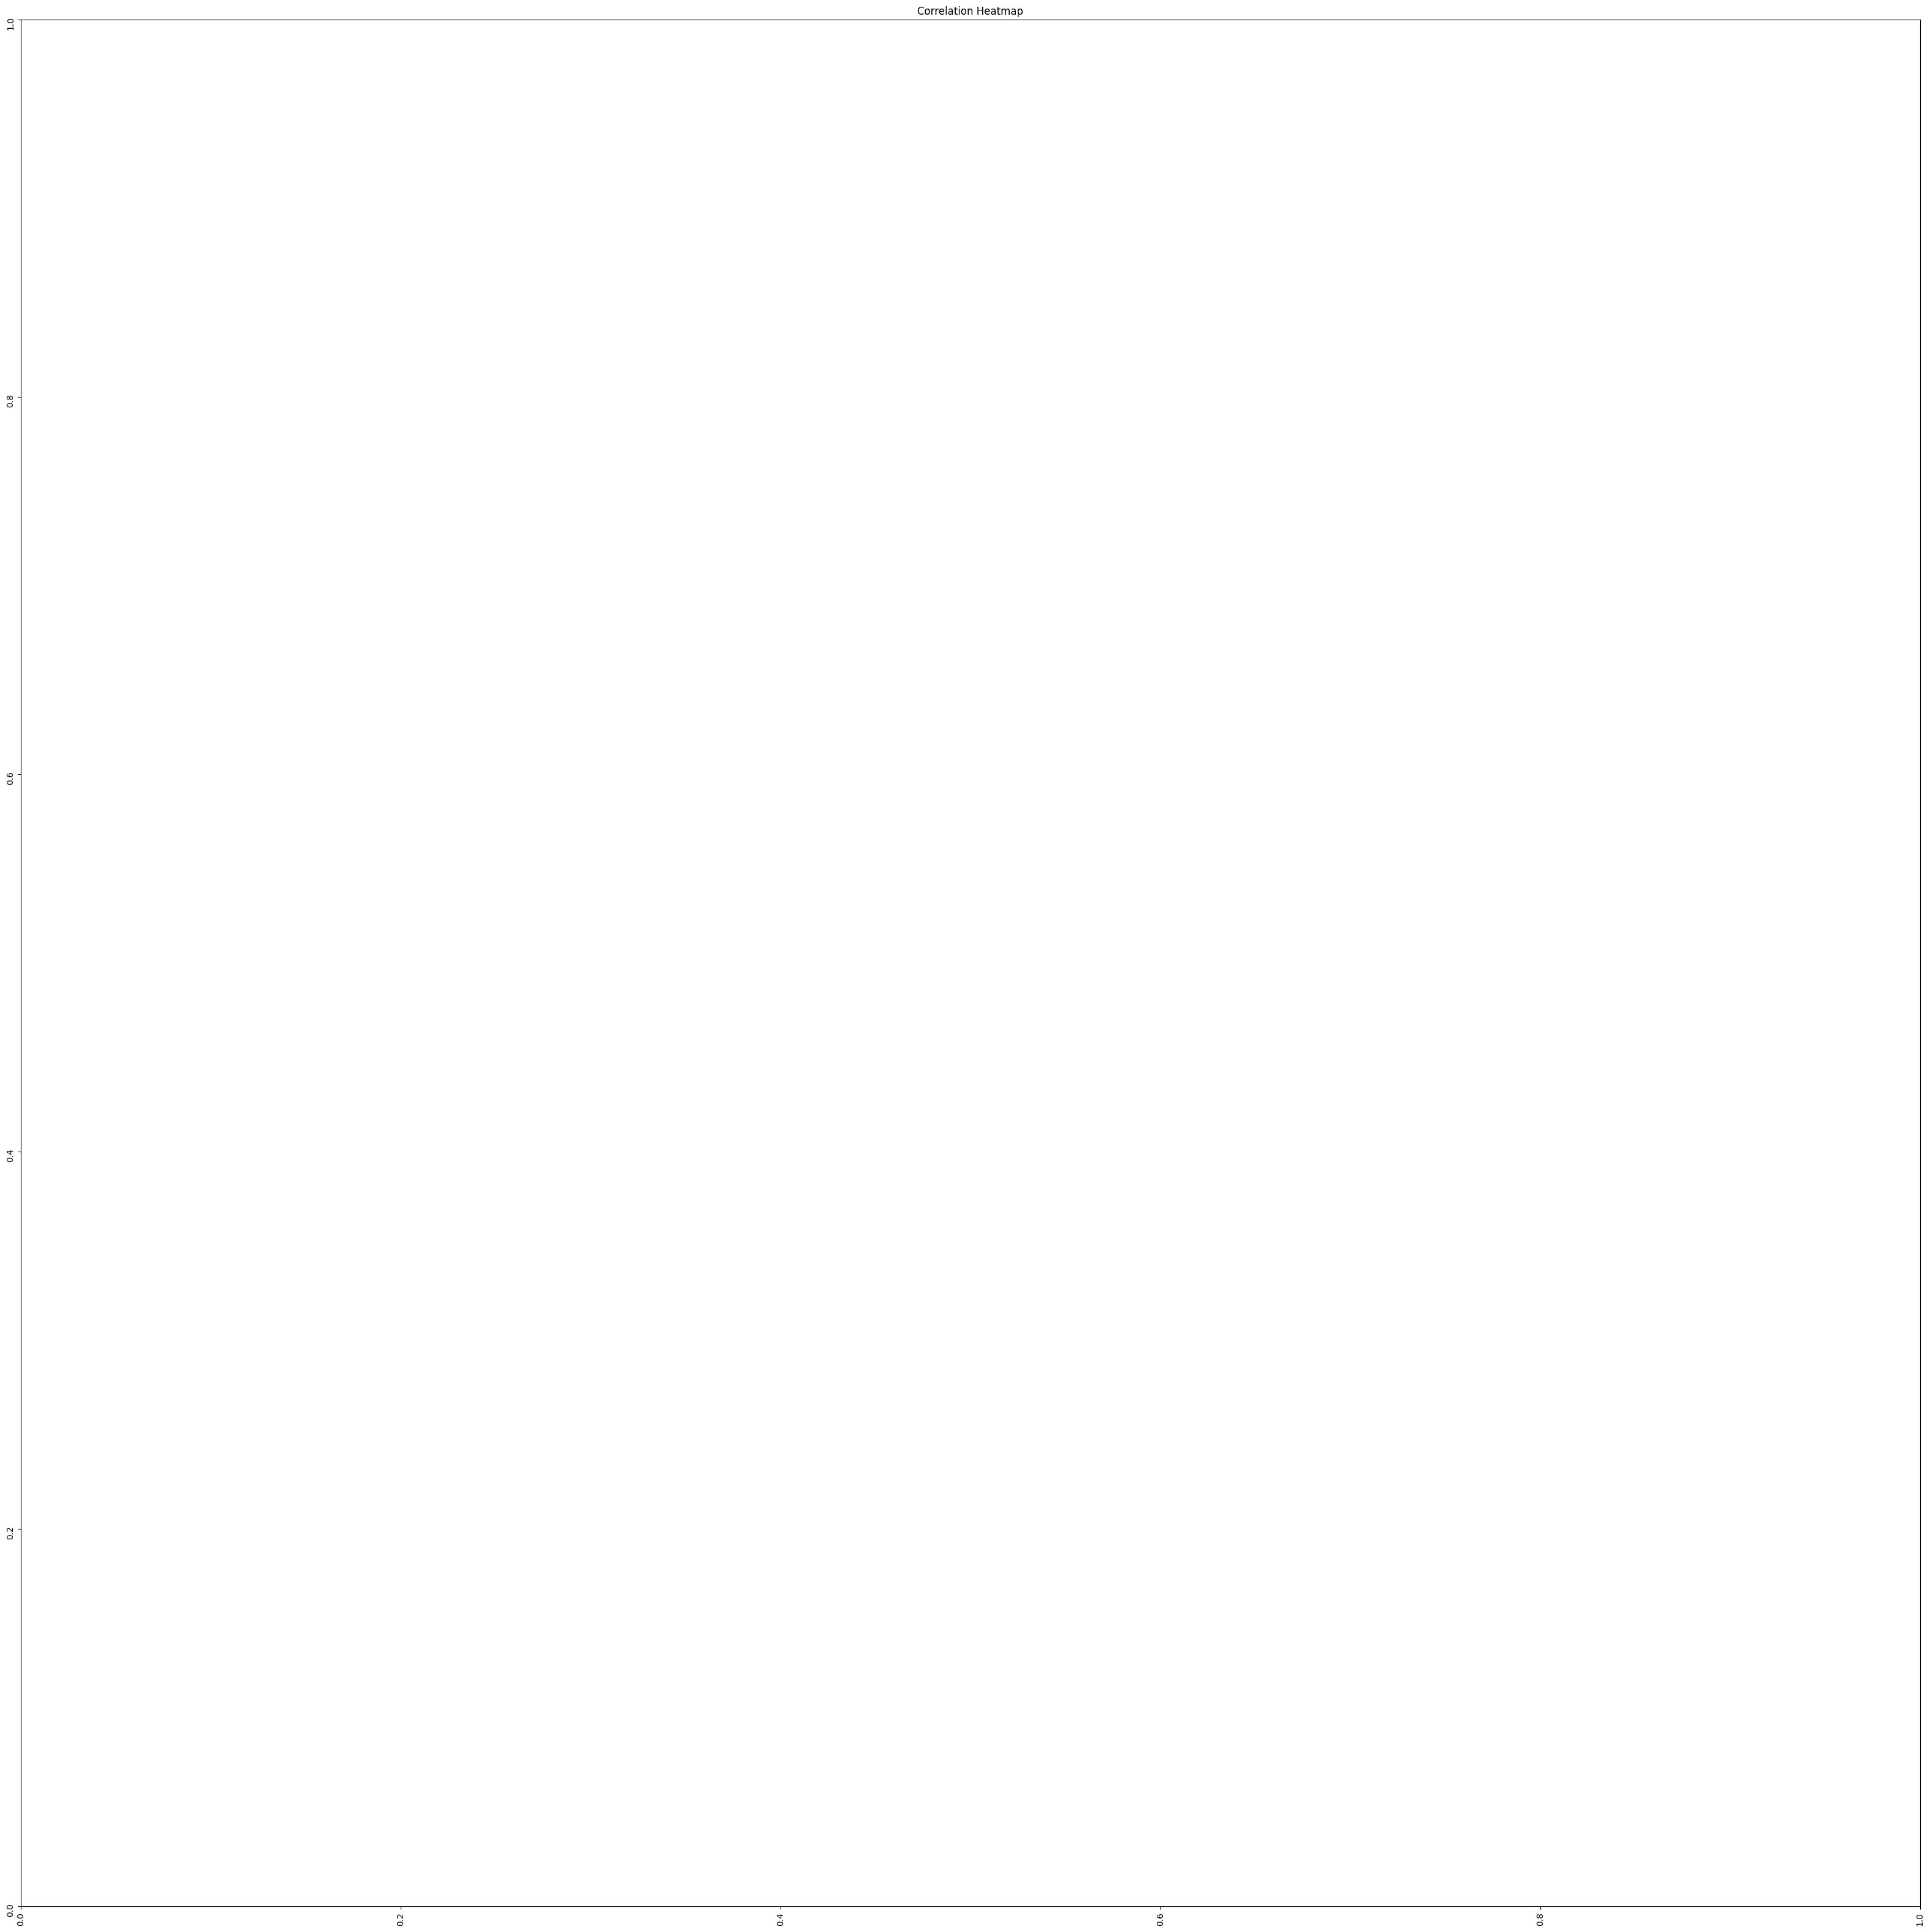

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel("Data_clean\Data_GPA_CPA_final_8_ky.xlsx")

danh_sach_mon = [col for col in df.columns if col not in ['EncryptedID', 'Final CPA', 'TC_qua_1', 'TC_qua_2', 'TC_qua_3', 'TC_qua_4', 'TC_qua_5', 'TC_qua_6', 'TC_qua_7', 'TC_qua_8', 'TC_LK_1', 'TC_LK_2', 'TC_LK_3', 'TC_LK_4', 'TC_LK_5', 'TC_LK_6', 'TC_LK_7', 'TC_LK_8']]
sns.heatmap(df[danh_sach_mon].corr(), annot=True, cmap='coolwarm')
plt.figure(figsize=(40,40))  # tùy chỉnh chiều rộng và chiều cao
# sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')

plt.title('Correlation Heatmap')
plt.yticks(rotation=90)
plt.xticks(rotation=90)
plt.show()